In [1]:
import time
import random
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [2]:
x_data = np.loadtxt('x_data.txt', dtype=int)
y_data = np.loadtxt('y_data.txt', dtype=int)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
size = 16

In [4]:
model = Sequential()
model.add(Dense(16, input_shape=(size,), activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(120, activation = "softmax"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 120)               3960      
Total params: 4,776
Trainable params: 4,776
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, epochs=50, verbose=True, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 2s 1ms/step - loss: 2.8026 - accuracy: 0.3634 - val_loss: 2.5953 - val_accuracy: 0.3918
Epoch 2/50
1688/1688 [==============================] - 2s 1ms/step - loss: 2.5761 - accuracy: 0.3878 - val_loss: 2.5527 - val_accuracy: 0.3915
Epoch 3/50
1688/1688 [==============================] - 2s 1ms/step - loss: 2.5473 - accuracy: 0.3886 - val_loss: 2.5073 - val_accuracy: 0.3920
Epoch 4/50
1688/1688 [==============================] - 2s 1ms/step - loss: 2.5271 - accuracy: 0.3889 - val_loss: 2.5022 - val_accuracy: 0.3940
Epoch 5/50
1688/1688 [==============================] - 2s 1ms/step - loss: 2.5193 - accuracy: 0.3882 - val_loss: 2.5128 - val_accuracy: 0.3905
Epoch 6/50
1688/1688 [==============================] - 2s 1ms/step - loss: 2.5149 - accuracy: 0.3881 - val_loss: 2.5010 - val_accuracy: 0.3920
Epoch 7/50
1688/1688 [==============================] - 2s 1ms/step - loss: 2.5155 - accuracy: 0.3879 - val_loss: 2.5023 - val_accuracy:

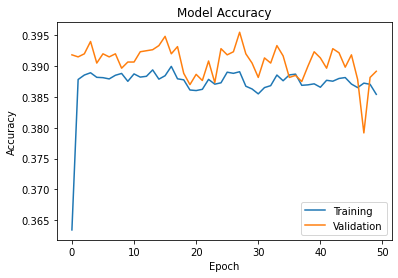

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [7]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(x_test)
print("Accuracy -", metrics.accuracy_score(y_test, y_pred))